In [ ]:
# In the last assignment, I didn't know the hints about the data, so I'll use them now.
# That is;
"""
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)
"""

In [9]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

# Iris Dataset

In [10]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [11]:
full_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1
row_0,,
0,0,50
1,50,0
2,50,0


In [12]:
full_pred = np.array([0 if x == 1 else 1 if x==0 else 2 for x in full_pred])

pd.crosstab(y, full_pred)

col_0,0,1
row_0,,
0,50,0
1,0,50
2,0,50


In [ ]:
# the model assigned 0's to 0's, and 1's and 2's to 1's.

In [13]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [14]:
rand_index_score(y, full_pred)

1.0

In [18]:
"""
that means our model is perfectly working. but how?
that is because 0's is separable from 1's and 2's, however 1's and 2's are not.
also our model clustered 1's and 2's as a whole.
that is why we got this result.
"""

"\nthat means our model is perfectly working. but how?\nthat is because 0's is separable from 1's and 2's, however 1's and 2's are not.\nalso our model clustered 1's and 2's as a whole.\nthat is why we got this result.\n"

In [16]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y, full_pred)

0.5681159420289855

In [ ]:
# since 0.56 > 0.5, our model is closer to perfect than random

# Silhouette Score on 2 clusters

In [17]:
model = KMeans(n_clusters=2, random_state=123).fit(X_std)
labels = model.labels_
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.5817500491982808


In [ ]:
# recall that the silhouette score on 3 clusters was 0.49, so 2 clusters have a better silhouette score.


# Heart Disease Dataset

In [74]:
heart_disease = pd.read_excel('Processed_Cleveland.xlsx')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [75]:
# Define the features and the outcome
X = heart_disease.iloc[:, :13]
y = heart_disease.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [76]:
# we had to deduce one row from our first half, since the values do not match in the below code.
X = X.drop(X.iloc[[150]].index)

In [77]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [78]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

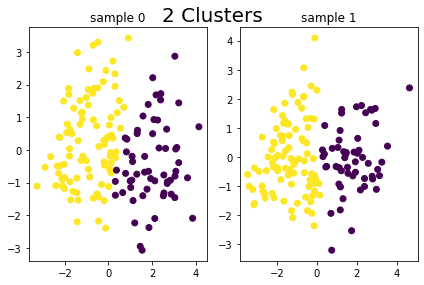

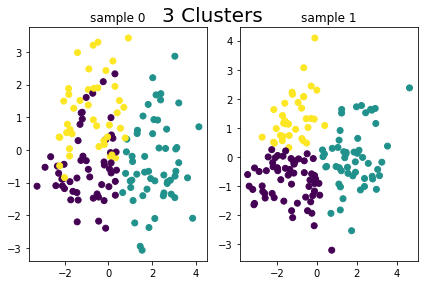

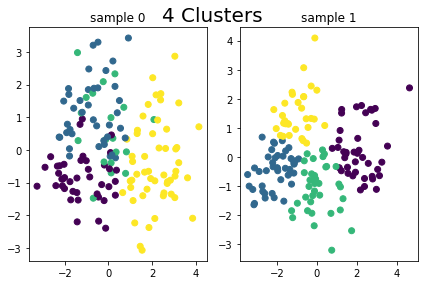

In [79]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

# K-means' on Heart Disease

10 loops, best of 5: 23.7 ms per loop


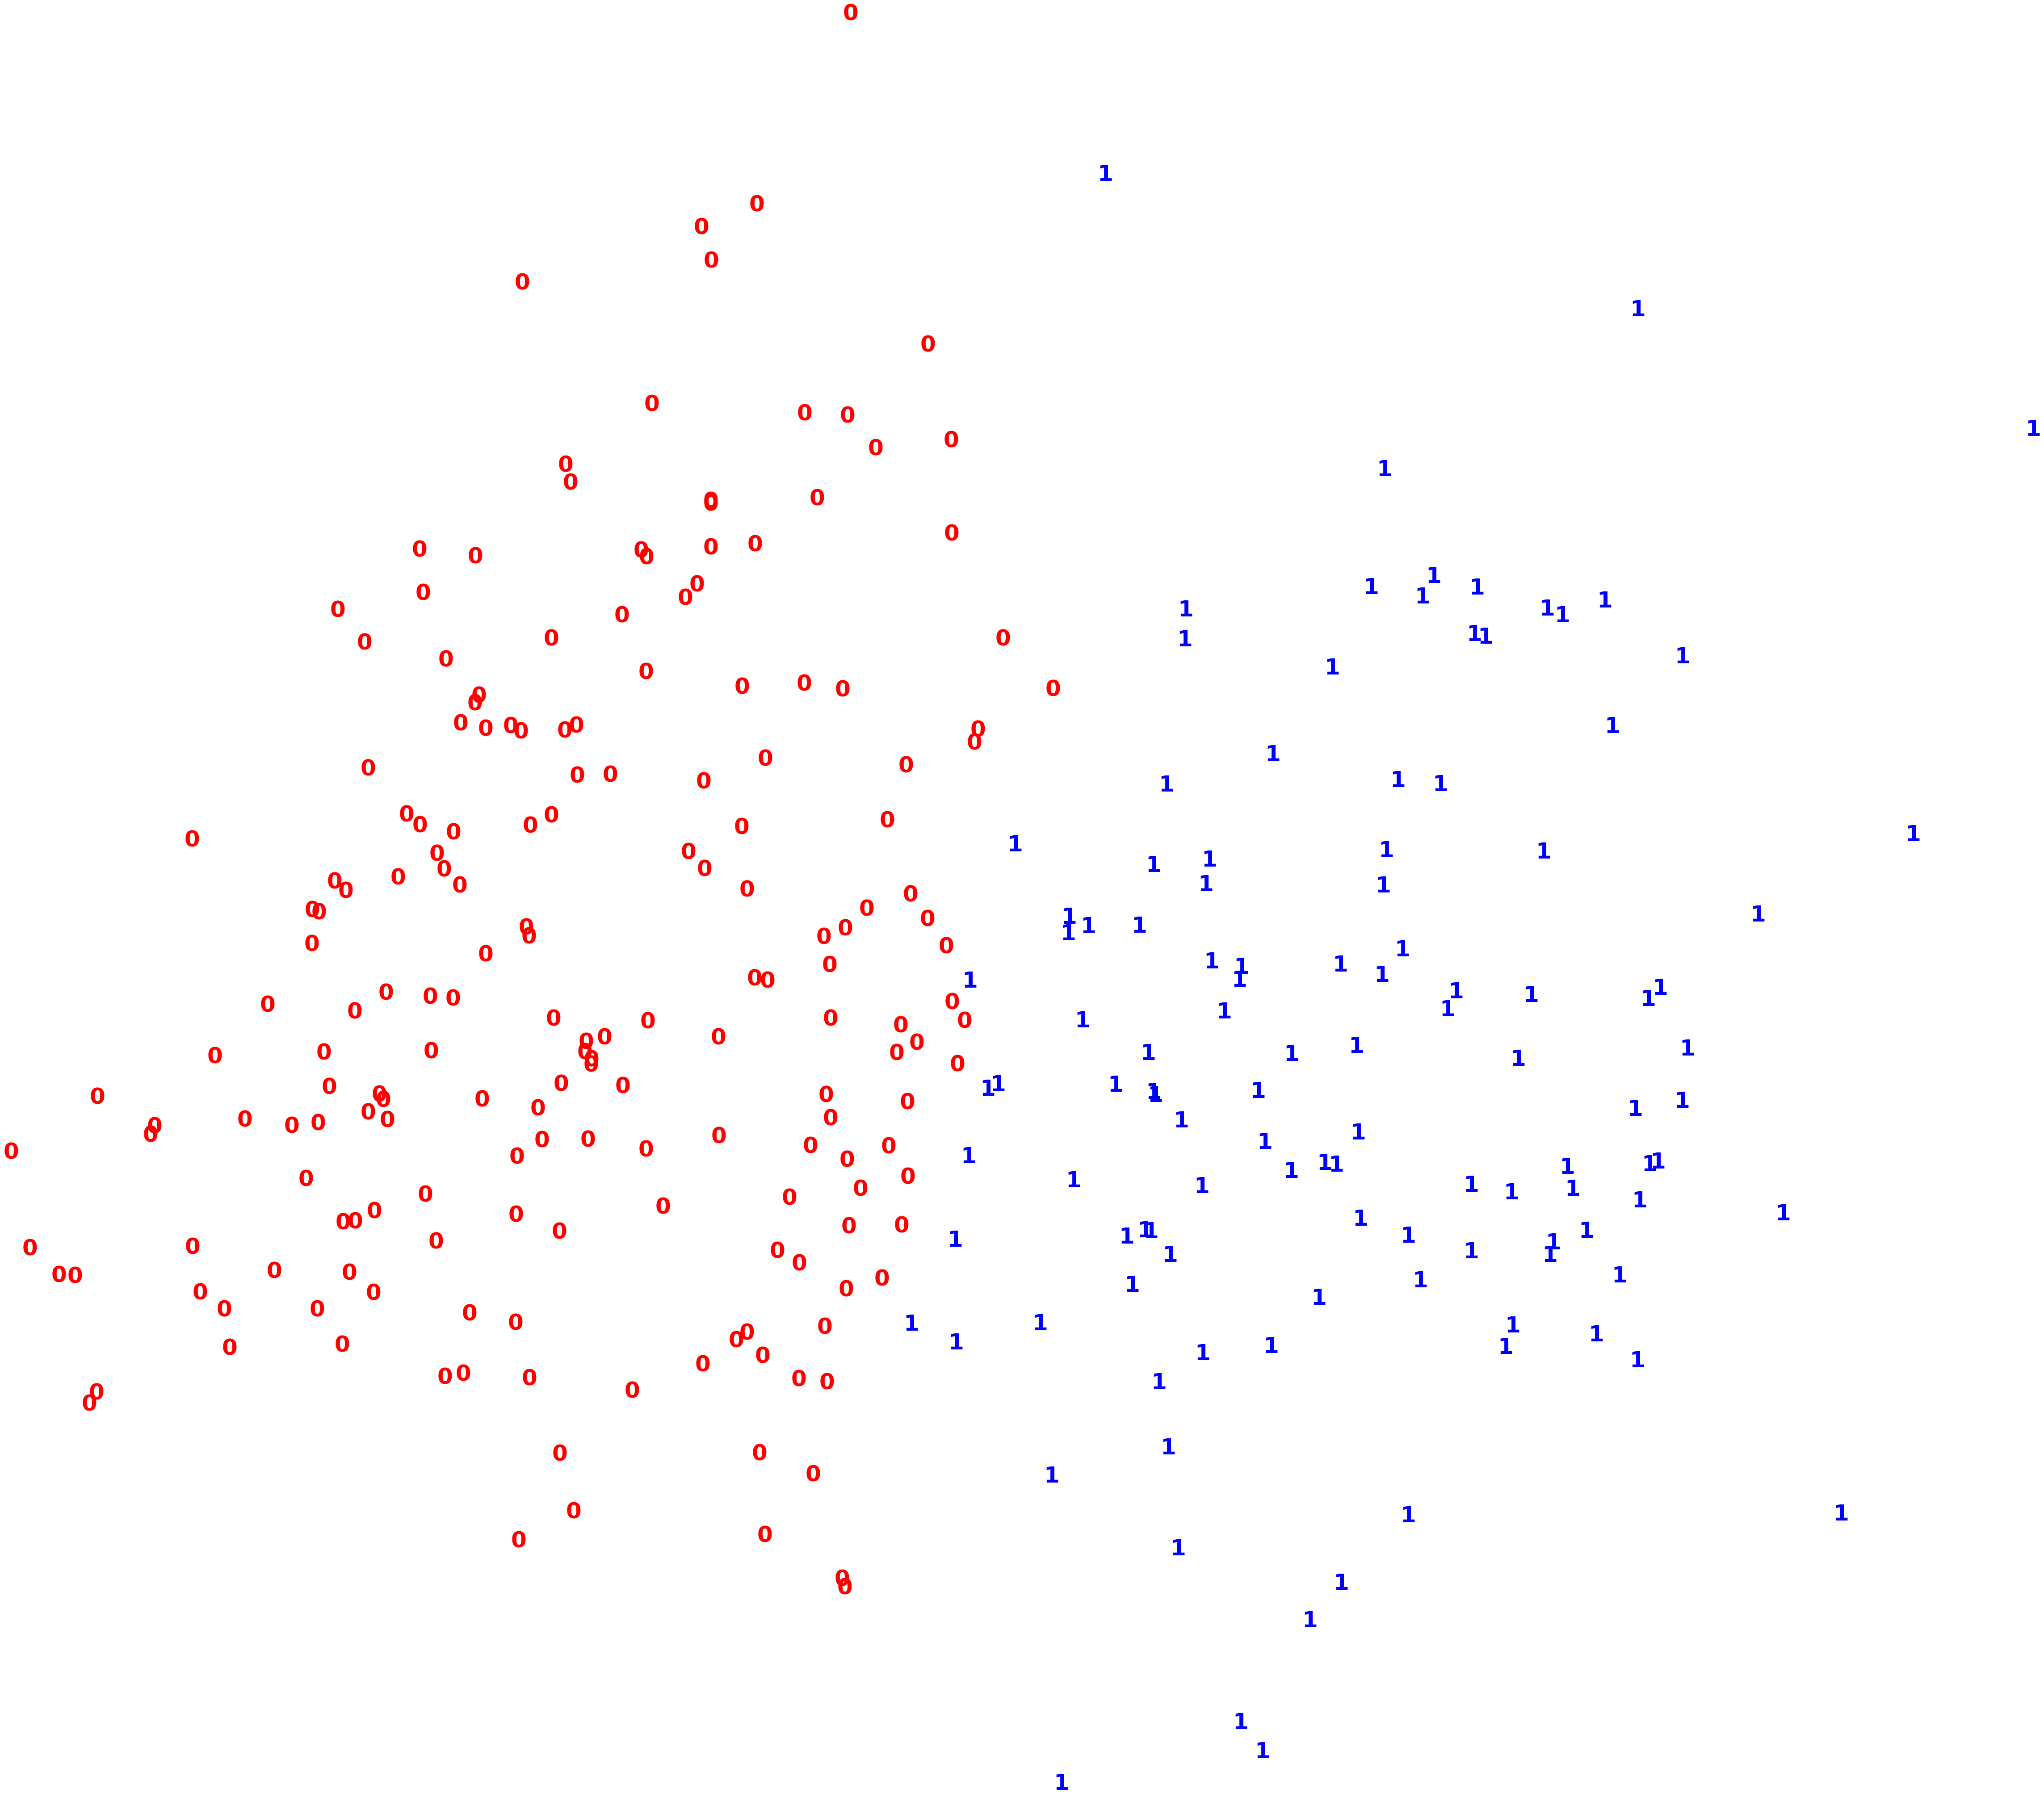

10 loops, best of 5: 31 ms per loop


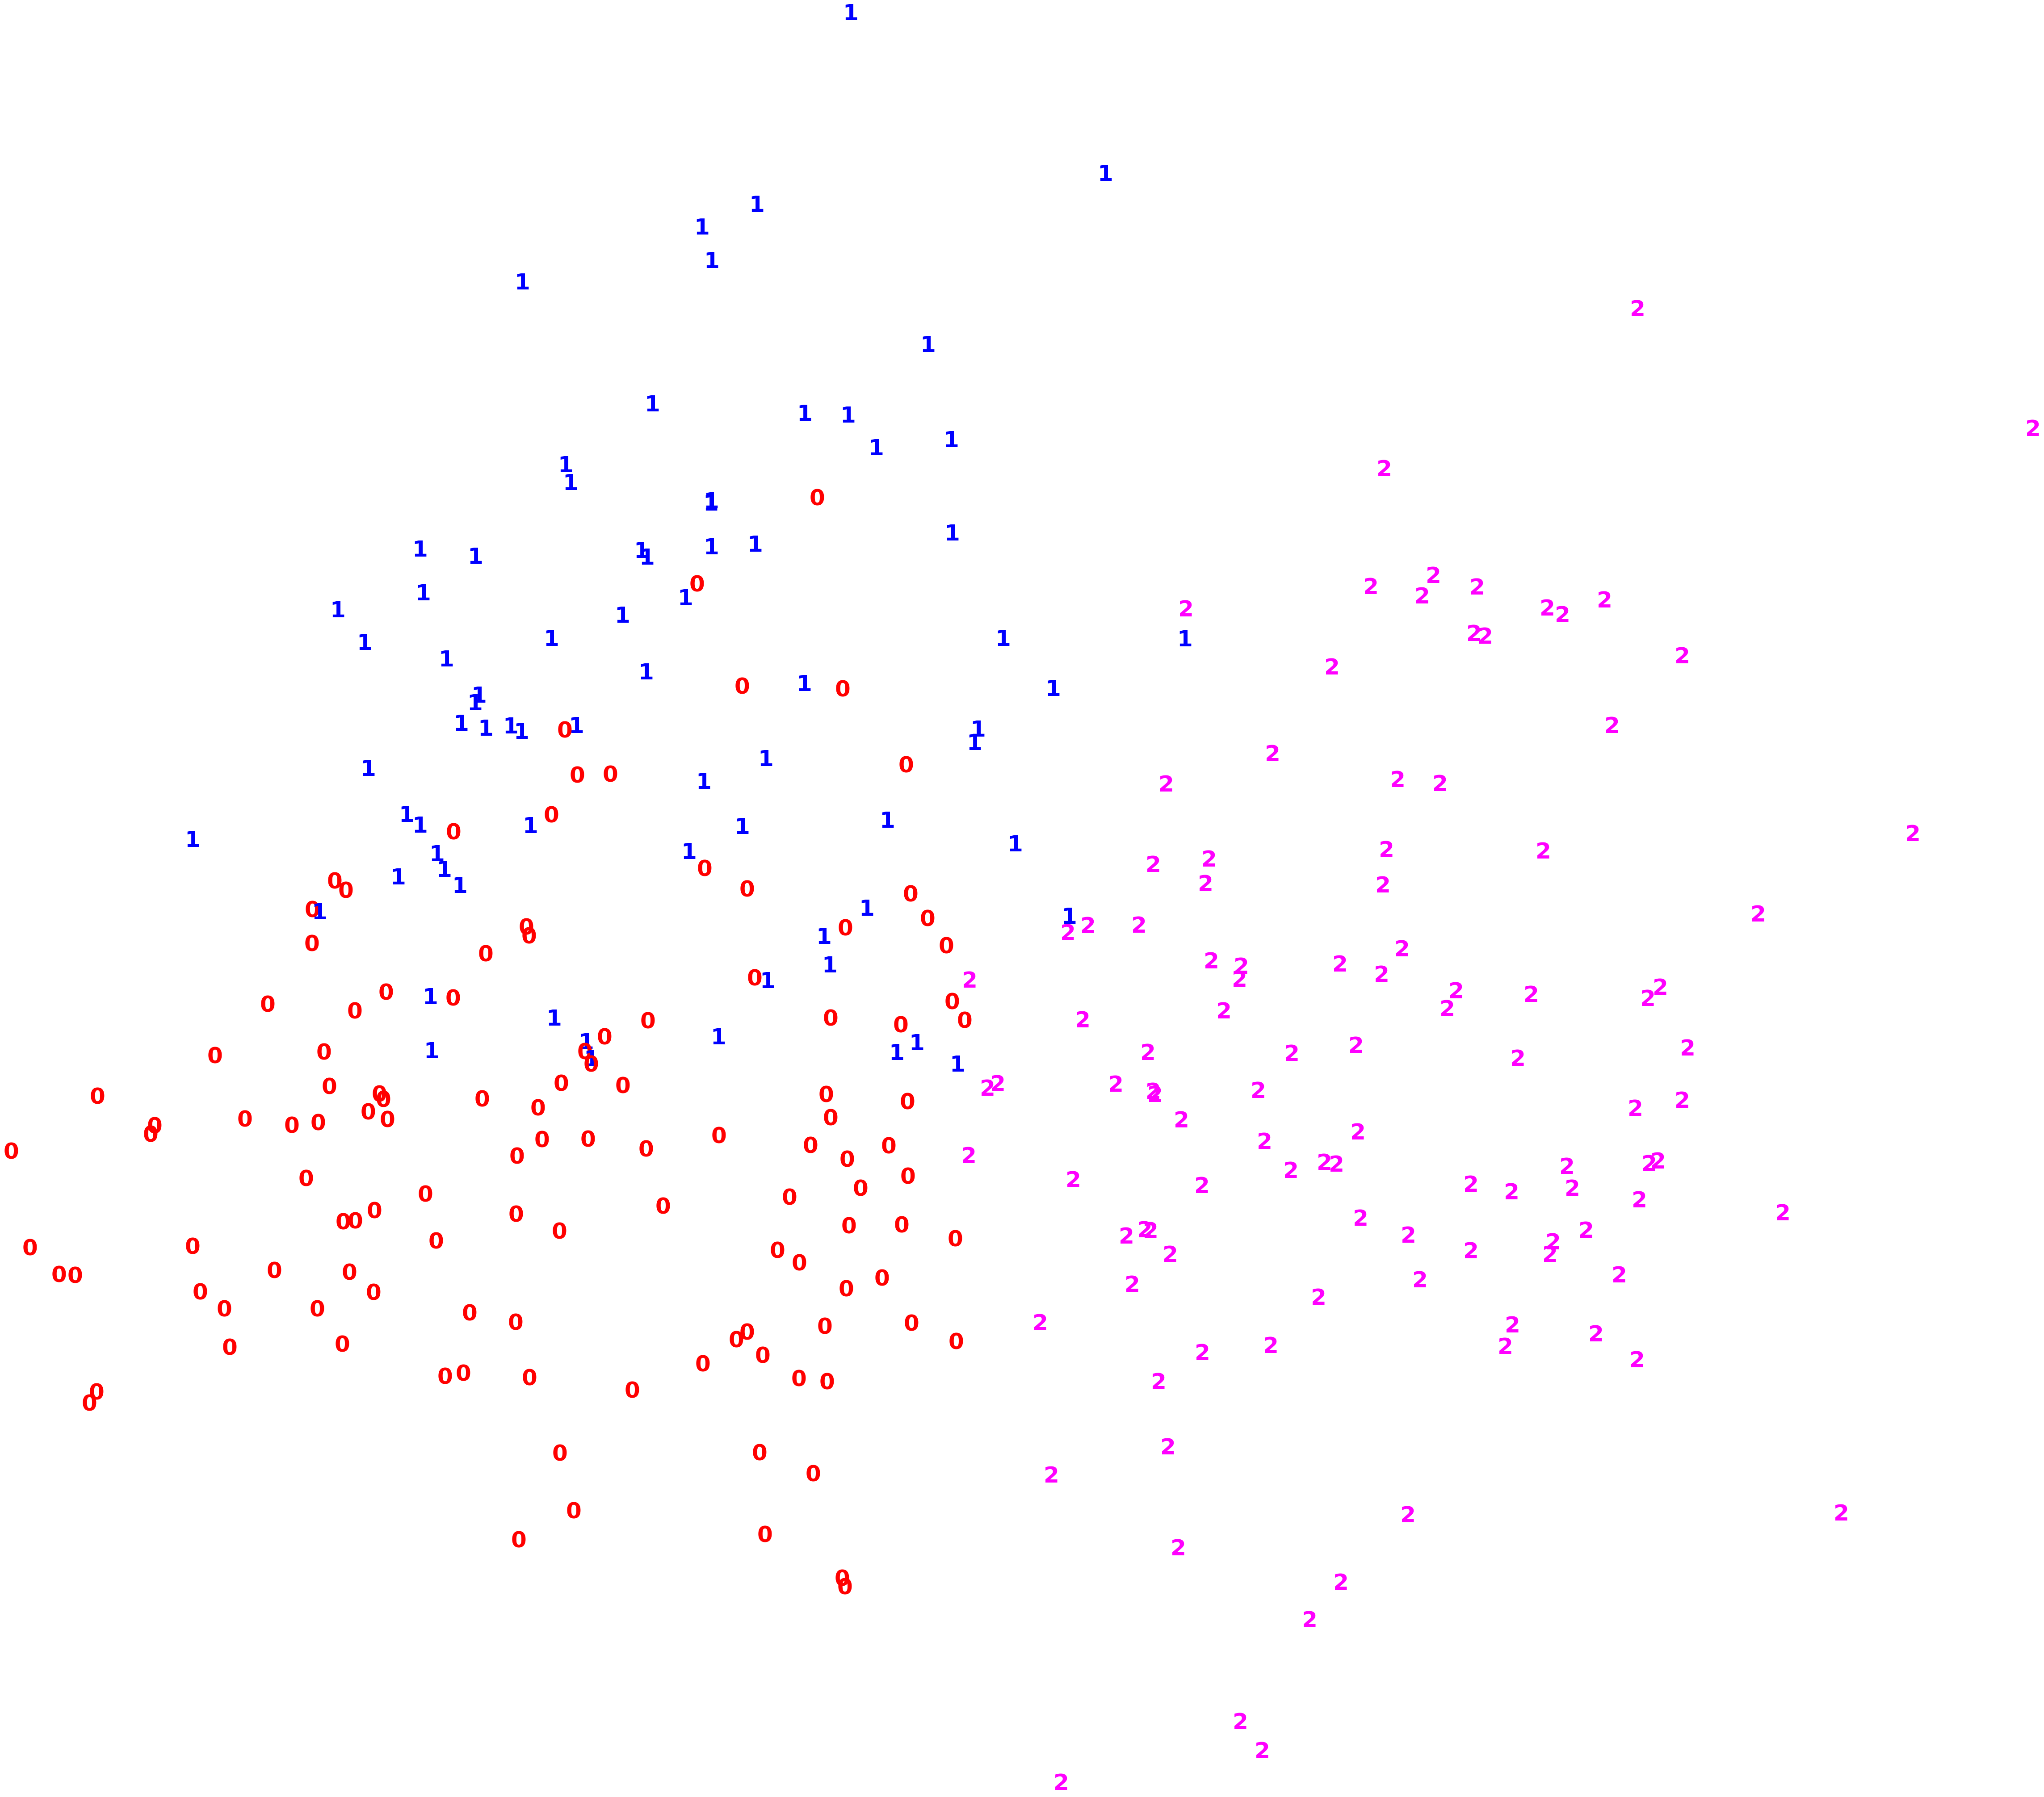

10 loops, best of 5: 45.5 ms per loop


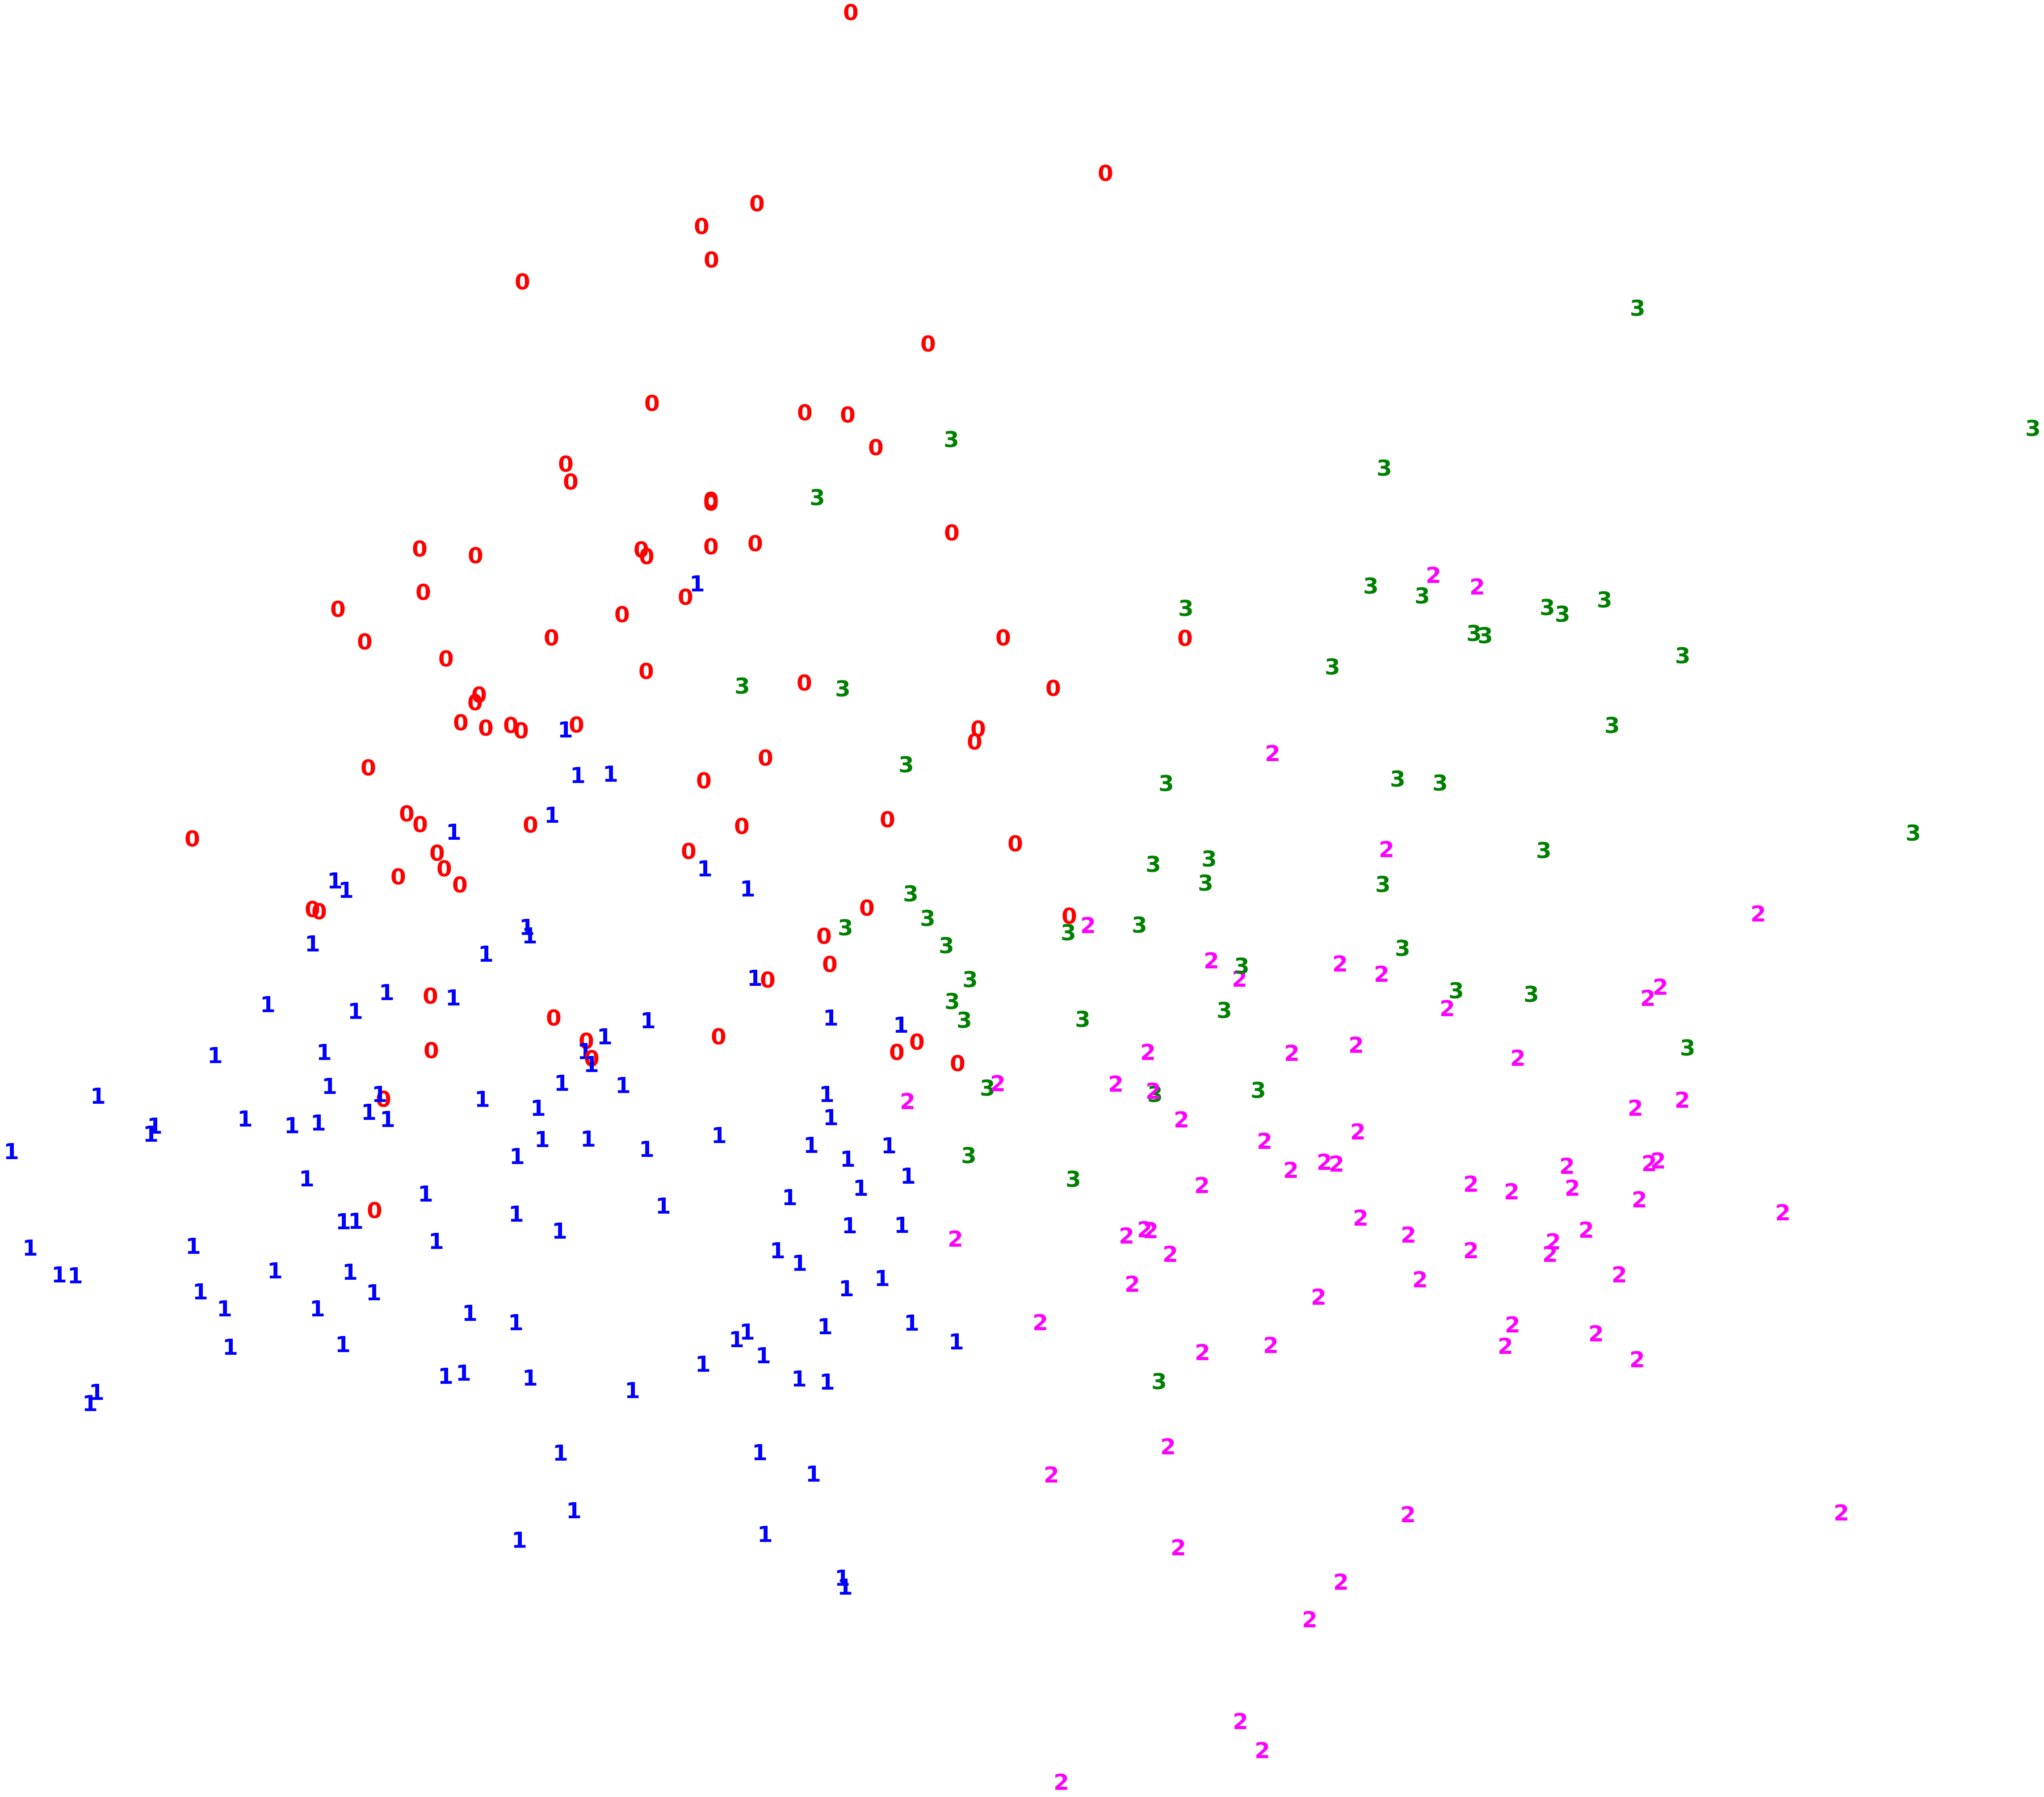

In [80]:
for index in range(2,5):  
  
  kmeans_cluster = KMeans(n_clusters=index, random_state=123)

  # Fit model
  %timeit kmeans_cluster.fit(X_std)
  y_pred = kmeans_cluster.predict(X_std)

  pca = PCA(n_components=2).fit_transform(X_std)

  plt.figure(figsize=(10,10))
  colours = ['red', 'blue', 'magenta', 'green', 'k']
  for i in range(pca.shape[0]):
      plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
              color=colours[y_pred[i]],
              fontdict={'weight': 'bold', 'size': 50}
          )

  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()

In [81]:
# as the cluster number increased, the model worsened.

# RI scores

In [82]:
y = np.delete(y, 150)
# I had to do this since dimensions did not match

In [83]:
for index in range(2,5):
  full_pred = KMeans(n_clusters=index, random_state=123).fit_predict(X_std)

  print("---------------------")
  print(f"RI scores for {index} clusters;")
  print("RI score:")
  print(metrics.adjusted_rand_score(y, full_pred))
  print("ARI score:")
  print(rand_index_score(y, full_pred))

---------------------
RI scores for 2 clusters;
RI score:
0.43661540614807665
ARI score:
0.7453081340344547
---------------------
RI scores for 3 clusters;
RI score:
0.2806926076121614
ARI score:
0.48243162966711406
---------------------
RI scores for 4 clusters;
RI score:
0.20620145900489426
ARI score:
0.36626256848034144


In [ ]:
# In both metrics, 2 clusters performed best.

# Silhouette Scores

In [84]:
for i in range(2,5):

  model = KMeans(n_clusters=i, random_state=123).fit(X_std)
  labels = model.labels_
  print(f"Silhouette Score for {i} clusters:")
  print(metrics.silhouette_score(X_std, labels, metric='euclidean'))
  print("---------------")

Silhouette Score for 2 clusters:
0.1757847117726187
---------------
Silhouette Score for 3 clusters:
0.12946930438929294
---------------
Silhouette Score for 4 clusters:
0.12259244737112623
---------------


In [ ]:
# Again, 2 clusters performed best. however, even it is not that good since 0.17 < 0.50